## Gather Stock Data

Fetch historical daily stock price data for a diversified set of stocks (e.g., Apple, Google, Microsoft, Amazon, Tesla, SPY ETF) for a one-year period. I will use data from a recent historical period (e.g., the last 12 months ending in the present) as a proxy for the '2025' simulation period, as future data is not available. The user can specify different stocks or a different historical period if desired.


In [27]:
pip install yfinance
print("yfinance library installed.")

SyntaxError: invalid syntax (3783473510.py, line 1)

In [28]:
get_ipython().system('pip install yfinance')
print("yfinance library installed.")

yfinance library installed.


In [29]:
import yfinance as yf
from datetime import datetime, timedelta

# 1. Define a list of stock tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'SPY']

# 2. Determine the start and end dates for the one-year historical period
end_date = datetime.now()
start_date = end_date - timedelta(days=365) # Approximately one year prior

print(f"Tickers selected: {tickers}")
print(f"Data period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Tickers selected: ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'SPY']
Data period: 2025-02-23 to 2026-02-23


In [31]:
data = yf.download(tickers, start=start_date, end=end_date)['Close']

print("Historical data downloaded successfully. Displaying the first 5 rows:")
print(data.head())

[*********************100%***********************]  6 of 6 completed

Historical data downloaded successfully. Displaying the first 5 rows:
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY  \
Date                                                                     
2025-02-24  246.027710  212.710007  178.550720  400.930634  590.278320   
2025-02-25  245.967972  212.800003  174.735657  394.876984  587.342773   
2025-02-26  239.316956  214.350006  172.056152  396.693115  587.639221   
2025-02-27  236.270233  208.740005  167.842667  389.547760  578.259399   
2025-02-28  240.790527  212.279999  169.615707  393.973877  587.283447   

Ticker            TSLA  
Date                    
2025-02-24  330.529999  
2025-02-25  302.799988  
2025-02-26  290.799988  
2025-02-27  281.950012  
2025-02-28  292.980011  


In [32]:
print("Data shape:", data.shape)
print("\nData information:")
data.info()

Data shape: (250, 6)

Data information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2025-02-24 to 2026-02-20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    250 non-null    float64
 1   AMZN    250 non-null    float64
 2   GOOGL   250 non-null    float64
 3   MSFT    250 non-null    float64
 4   SPY     250 non-null    float64
 5   TSLA    250 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


In [7]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Define a list of stock tickers (re-using from previous steps)
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'SPY']

# Determine the start and end dates (re-using from previous steps)
end_date = datetime.now()
start_date = end_date - timedelta(days=365) # Approximately one year prior

# Re-fetch comprehensive historical OHLCV data
ohlcv_data = yf.download(tickers, start=start_date, end=end_date)

print("Comprehensive historical OHLCV data downloaded successfully. Displaying the first 5 rows:")
print(ohlcv_data.head())

print("\nData information:")
ohlcv_data.info()

[*********************100%***********************]  6 of 6 completed

Comprehensive historical OHLCV data downloaded successfully. Displaying the first 5 rows:
Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY   
Date                                                                     
2025-02-24  246.027710  212.710007  178.550720  400.930634  590.278198   
2025-02-25  245.967972  212.800003  174.735657  394.876984  587.342773   
2025-02-26  239.316956  214.350006  172.056137  396.693115  587.639221   
2025-02-27  236.270248  208.740005  167.842651  389.547760  578.259399   
2025-02-28  240.790543  212.279999  169.615692  393.973877  587.283386   

Price                         High                                      ...  \
Ticker            TSLA        AAPL        AMZN       GOOGL        MSFT  ...   
Date                                                                    ...   
2025-02-24  330.529999  247.780067  217.720001  182.405618  406.259830  ...   
2

In [33]:
get_ipython().system('pip install ta')
print("TA library installed.")

TA library installed.


In [34]:
import ta.trend
import ta.momentum

print("TA trend and momentum modules imported.")

TA trend and momentum modules imported.


In [36]:
print('Defining strategy parameters...')

# Define strategy parameters
# Simple Moving Average (SMA) Crossover
SMA_short_window = 20
SMA_long_window = 50

# Relative Strength Index (RSI) based
RSI_window = 14
RSI_overbought = 70
RSI_oversold = 30

# Moving Average Convergence Divergence (MACD) Crossover
MACD_fast_period = 12
MACD_slow_period = 26
MACD_signal_period = 9

# Volatility Breakout
Volatility_window = 20  # Used for calculating historical volatility, though not directly in the simple formula here
Volatility_k_factor = 0.5 # A factor to multiply the trading range by

print("Strategy parameters defined:")
print(f"  SMA: Short Window={SMA_short_window}, Long Window={SMA_long_window}")
print(f"  RSI: Window={RSI_window}, Overbought={RSI_overbought}, Oversold={RSI_oversold}")
print(f"  MACD: Fast Period={MACD_fast_period}, Slow Period={MACD_slow_period}, Signal Period={MACD_signal_period}")
print(f"  Volatility Breakout: K-factor={Volatility_k_factor}")

Defining strategy parameters...
Strategy parameters defined:
  SMA: Short Window=20, Long Window=50
  RSI: Window=14, Overbought=70, Oversold=30
  MACD: Fast Period=12, Slow Period=26, Signal Period=9
  Volatility Breakout: K-factor=0.5


In [11]:
def sma_crossover_signals(df_stock, short_window, long_window):
    """Generates trading signals for the Simple Moving Average Crossover strategy."""
    signals = pd.Series(0, index=df_stock.index) # 0 for hold

    # Calculate short and long term Simple Moving Averages
    df_stock['SMA_Short'] = ta.trend.sma_indicator(df_stock['Close'], window=short_window)
    df_stock['SMA_Long'] = ta.trend.sma_indicator(df_stock['Close'], window=long_window)

    # Generate buy signals when short SMA crosses above long SMA
    signals[df_stock['SMA_Short'] > df_stock['SMA_Long']] = 1
    # Generate sell signals when short SMA crosses below long SMA
    signals[df_stock['SMA_Short'] < df_stock['SMA_Long']] = -1

    # Avoid signals for the initial periods where SMAs are not fully calculated
    signals.iloc[:long_window-1] = 0
    return signals

print("SMA Crossover signal function defined.")

SMA Crossover signal function defined.


In [37]:
def rsi_signals(df_stock, rsi_window, overbought_threshold, oversold_threshold):
    """Generates trading signals for the Relative Strength Index (RSI) strategy."""
    signals = pd.Series(0, index=df_stock.index) # 0 for hold

    # Calculate RSI
    df_stock['RSI'] = ta.momentum.rsi(df_stock['Close'], window=rsi_window)

    # Generate buy signals when RSI crosses below oversold threshold
    signals[df_stock['RSI'] < oversold_threshold] = 1
    # Generate sell signals when RSI crosses above overbought threshold
    signals[df_stock['RSI'] > overbought_threshold] = -1

    # Avoid signals for the initial periods where RSI is not fully calculated
    signals.iloc[:rsi_window-1] = 0
    return signals

print("RSI signal function defined.")

RSI signal function defined.


In [38]:
def macd_crossover_signals(df_stock, fast_period, slow_period, signal_period):
    """Generates trading signals for the Moving Average Convergence Divergence (MACD) Crossover strategy."""
    signals = pd.Series(0, index=df_stock.index) # 0 for hold

    # Calculate MACD and Signal lines
    df_stock['MACD'] = ta.trend.macd(df_stock['Close'], window_fast=fast_period, window_slow=slow_period)
    df_stock['MACD_Signal'] = ta.trend.macd_signal(df_stock['Close'], window_fast=fast_period, window_slow=slow_period, window_sign=signal_period)

    # Generate buy signals when MACD crosses above Signal line
    # Use .shift(1) to avoid looking ahead (comparing current MACD with previous Signal line to avoid bias)
    # The actual signal occurs when MACD crosses _above_ Signal line, which means MACD_prev <= MACD_Signal_prev and MACD_curr > MACD_Signal_curr
    signals[(df_stock['MACD'].shift(1) <= df_stock['MACD_Signal'].shift(1)) & (df_stock['MACD'] > df_stock['MACD_Signal'])] = 1
    # Generate sell signals when MACD crosses below Signal line
    signals[(df_stock['MACD'].shift(1) >= df_stock['MACD_Signal'].shift(1)) & (df_stock['MACD'] < df_stock['MACD_Signal'])] = -1

    # Avoid signals for initial periods where MACD and Signal lines are not fully calculated
    signals.iloc[:slow_period + signal_period - 2] = 0 # Adjust as per TA-Lib/TA library implementation
    return signals

print("MACD Crossover signal function defined.")

MACD Crossover signal function defined.


In [14]:
def volatility_breakout_signals(df_stock, k_factor):
    """Generates trading signals for the Volatility Breakout strategy."""
    signals = pd.Series(0, index=df_stock.index) # 0 for hold

    # Calculate the previous day's trading range (High - Low)
    # Shift by 1 to use the previous day's range
    prev_day_range = (df_stock['High'].shift(1) - df_stock['Low'].shift(1))

    # Define the buy threshold: Today's Open + (Previous Day's Range * k_factor)
    buy_threshold = df_stock['Open'] + (prev_day_range * k_factor)

    # Generate buy signals when today's Close price is greater than the buy threshold
    signals[df_stock['Close'] > buy_threshold] = 1

    # Note: For volatility breakout, typically only long (buy) positions are considered.
    # If a sell signal were desired (e.g., shorting on a downside breakout),
    # it would be df_stock['Close'] < (df_stock['Open'] - (prev_day_range * k_factor))
    # However, the instruction only specifies buy signals based on the threshold. For simplicity, we'll stick to buy signals.

    # Avoid signals for the first day or any NaN values from .shift(1)
    signals.iloc[0] = 0
    return signals

print("Volatility Breakout signal function defined.")

Volatility Breakout signal function defined.


In [39]:
initial_capital = 1_000_000 # $1 million
commission_rate = 0.001       # 0.1% per trade

# Dictionary to store daily portfolio values for all strategies
all_strategy_portfolios = {}

print(f"Initial Capital: ${initial_capital:,.2f}")
print(f"Commission Rate: {commission_rate*100:.1f}%")
print("Initialized dictionary for storing strategy portfolio values.")

Initial Capital: $1,000,000.00
Commission Rate: 0.1%
Initialized dictionary for storing strategy portfolio values.


In [41]:
import numpy as np

# Extract 'Close' prices from ohlcv_data for easier access
close_prices = ohlcv_data['Close']

# 1. Initialize cash with initial_capital
bh_cash = initial_capital

# 2. Calculate the initial number of shares for each ticker
# Get the first trading day's close prices
first_day_close_prices = close_prices.iloc[0]

# Allocate capital equally among tickers
capital_per_stock = bh_cash / len(tickers)

# Calculate shares for each stock
bh_holdings = {}
for ticker in tickers:
    if first_day_close_prices[ticker] > 0:
        shares_to_buy = np.floor(capital_per_stock / first_day_close_prices[ticker])
        bh_holdings[ticker] = shares_to_buy
        # Deduct the cost from cash (no commission for initial buy in this simplified model for B&H)
        # For strict backtesting, commission should be applied here. For B&H, often simplified.
        # We will keep bh_cash as initial_capital for portfolio value calculation
    else:
        bh_holdings[ticker] = 0

# 3. Initialize a Series to store the daily portfolio values for Buy and Hold
buy_and_hold_portfolio_values = pd.Series(index=close_prices.index, dtype=float)

# 4. For each trading day, calculate and store the total portfolio value
for date in close_prices.index:
    current_portfolio_value = 0
    # Value of held shares
    for ticker in tickers:
        current_portfolio_value += bh_holdings[ticker] * close_prices.loc[date, ticker]

    # Add remaining cash (if any, though for B&H all is invested on day 1)
    # In this specific B&H implementation, all capital is invested, so cash is 0 after initial buy
    # If there was uninvested cash initially, it would be added here.

    buy_and_hold_portfolio_values.loc[date] = current_portfolio_value

# Store the Buy and Hold portfolio values
all_strategy_portfolios['Buy and Hold'] = buy_and_hold_portfolio_values

print("Buy and Hold strategy simulation complete.")
print("First 5 days of Buy and Hold portfolio values:")
print(buy_and_hold_portfolio_values.head())
print("Last 5 days of Buy and Hold portfolio values:")
print(buy_and_hold_portfolio_values.tail())

Buy and Hold strategy simulation complete.
First 5 days of Buy and Hold portfolio values:
Date
2025-02-24    999132.301071
2025-02-25    978286.891205
2025-02-26    967287.106644
2025-02-27    946829.853394
2025-02-28    964256.876541
dtype: float64
Last 5 days of Buy and Hold portfolio values:
Date
2026-02-13    1.182864e+06
2026-02-17    1.181775e+06
2026-02-18    1.188618e+06
2026-02-19    1.185263e+06
2026-02-20    1.204340e+06
dtype: float64


In [43]:
def run_strategy_backtest(strategy_name, signal_generator_func, tickers, ohlcv_data, initial_capital, commission_rate, **strategy_params):
    """Runs a backtest simulation for a given trading strategy.

    Args:
        strategy_name (str): The name of the strategy.
        signal_generator_func (function): Function that generates signals for a single stock.
        tickers (list): List of stock tickers.
        ohlcv_data (pd.DataFrame): DataFrame containing OHLCV data for all tickers.
        initial_capital (float): Starting capital for the portfolio.
        commission_rate (float): Commission rate per trade (e.g., 0.001 for 0.1%).
        **strategy_params: Keyword arguments for strategy-specific parameters.

    Returns:
        pd.Series: Daily portfolio values for the strategy.
    """

    cash = initial_capital
    holdings = {ticker: 0 for ticker in tickers}
    daily_portfolio_values = []
    trade_log = [] # Optional: for detailed trade analysis

    # Prepare a dictionary to store signals for each ticker
    all_signals = {}
    for ticker in tickers:
        # Extract OHLCV data for the specific ticker
        df_ticker = ohlcv_data.loc[:, (slice(None), ticker)].copy()
        df_ticker.columns = df_ticker.columns.droplevel(1)

        # Generate signals for the ticker using the provided function and parameters
        # Pass a copy to avoid modifying the original ohlcv_data during signal generation for one stock
        signals_for_ticker = signal_generator_func(df_ticker.copy(), **strategy_params)
        all_signals[ticker] = signals_for_ticker

    # Close prices for calculating portfolio value
    close_prices = ohlcv_data['Close']

    # Iterate through each trading day
    for date in close_prices.index:
        # Ensure we have enough historical data for calculations if strategy requires it
        # This is implicitly handled by the signal generation functions returning 0 for early dates

        # --- 1. Process Sell Signals First ---
        for ticker in tickers:
            if all_signals[ticker].get(date) == -1 and holdings[ticker] > 0: # Sell signal and currently holding
                num_shares_to_sell = holdings[ticker]
                sell_price = close_prices.loc[date, ticker]
                trade_value = num_shares_to_sell * sell_price
                commission_cost = trade_value * commission_rate

                cash += trade_value - commission_cost
                holdings[ticker] = 0
                # trade_log.append({'Date': date, 'Ticker': ticker, 'Action': 'SELL', 'Shares': num_shares_to_sell, 'Price': sell_price, 'Value': trade_value, 'Commission': commission_cost, 'Cash_After': cash})

        # --- 2. Process Buy Signals ---
        buy_candidates = []
        for ticker in tickers:
            if all_signals[ticker].get(date) == 1 and holdings[ticker] == 0: # Buy signal and not currently holding
                buy_candidates.append(ticker)

        if buy_candidates and cash > 0:
            capital_per_buy = cash / len(buy_candidates)
            for ticker in buy_candidates:
                buy_price = close_prices.loc[date, ticker]
                if buy_price > 0: # Ensure price is valid
                    # Calculate shares we can afford, considering commission on the trade value
                    # (shares * price) + (shares * price * commission_rate) = capital_per_buy
                    # shares * price * (1 + commission_rate) = capital_per_buy
                    # shares = capital_per_buy / (price * (1 + commission_rate))
                    num_shares_to_buy = np.floor(capital_per_buy / (buy_price * (1 + commission_rate)))

                    if num_shares_to_buy > 0:
                        trade_value = num_shares_to_buy * buy_price
                        commission_cost = trade_value * commission_rate

                        cash -= (trade_value + commission_cost)
                        holdings[ticker] += num_shares_to_buy
                        # trade_log.append({'Date': date, 'Ticker': ticker, 'Action': 'BUY', 'Shares': num_shares_to_buy, 'Price': buy_price, 'Value': trade_value, 'Commission': commission_cost, 'Cash_After': cash})

        # --- 3. Calculate Daily Portfolio Value ---
        current_portfolio_value = cash
        for ticker in tickers:
            current_portfolio_value += holdings[ticker] * close_prices.loc[date, ticker]
        daily_portfolio_values.append(current_portfolio_value)

    return pd.Series(daily_portfolio_values, index=close_prices.index, name=strategy_name)

print("General backtesting function (run_strategy_backtest) defined.")

General backtesting function (run_strategy_backtest) defined.


In [44]:
print('Running backtest for Simple Moving Average Crossover strategy...')
sma_portfolio_values = run_strategy_backtest(
    'SMA Crossover',
    sma_crossover_signals,
    tickers,
    ohlcv_data,
    initial_capital,
    commission_rate,
    short_window=SMA_short_window,
    long_window=SMA_long_window
)

all_strategy_portfolios['SMA Crossover'] = sma_portfolio_values

print("SMA Crossover strategy simulation complete.")
print("First 5 days of SMA Crossover portfolio values:")
print(sma_portfolio_values.head())
print("Last 5 days of SMA Crossover portfolio values:")
print(sma_portfolio_values.tail())

Running backtest for Simple Moving Average Crossover strategy...
SMA Crossover strategy simulation complete.
First 5 days of SMA Crossover portfolio values:
Date
2025-02-24    1000000.0
2025-02-25    1000000.0
2025-02-26    1000000.0
2025-02-27    1000000.0
2025-02-28    1000000.0
Name: SMA Crossover, dtype: float64
Last 5 days of SMA Crossover portfolio values:
Date
2026-02-13    1.283884e+06
2026-02-17    1.280314e+06
2026-02-18    1.282727e+06
2026-02-19    1.281678e+06
2026-02-20    1.295948e+06
Name: SMA Crossover, dtype: float64


In [45]:
print('Running backtest for Relative Strength Index (RSI) strategy...')
rsi_portfolio_values = run_strategy_backtest(
    'RSI Based',
    rsi_signals,
    tickers,
    ohlcv_data,
    initial_capital,
    commission_rate,
    rsi_window=RSI_window,
    overbought_threshold=RSI_overbought,
    oversold_threshold=RSI_oversold
)

all_strategy_portfolios['RSI Based'] = rsi_portfolio_values

print("RSI Based strategy simulation complete.")
print("First 5 days of RSI Based portfolio values:")
print(rsi_portfolio_values.head())
print("Last 5 days of RSI Based portfolio values:")
print(rsi_portfolio_values.tail())

Running backtest for Relative Strength Index (RSI) strategy...
RSI Based strategy simulation complete.
First 5 days of RSI Based portfolio values:
Date
2025-02-24    1000000.0
2025-02-25    1000000.0
2025-02-26    1000000.0
2025-02-27    1000000.0
2025-02-28    1000000.0
Name: RSI Based, dtype: float64
Last 5 days of RSI Based portfolio values:
Date
2026-02-13    1.001602e+06
2026-02-17    9.904726e+05
2026-02-18    9.973097e+05
2026-02-19    9.967345e+05
2026-02-20    9.936583e+05
Name: RSI Based, dtype: float64


In [46]:
print('Running backtest for Moving Average Convergence Divergence (MACD) Crossover strategy...')
macd_portfolio_values = run_strategy_backtest(
    'MACD Crossover',
    macd_crossover_signals,
    tickers,
    ohlcv_data,
    initial_capital,
    commission_rate,
    fast_period=MACD_fast_period,
    slow_period=MACD_slow_period,
    signal_period=MACD_signal_period
)

all_strategy_portfolios['MACD Crossover'] = macd_portfolio_values

print("MACD Crossover strategy simulation complete.")
print("First 5 days of MACD Crossover portfolio values:")
print(macd_portfolio_values.head())
print("Last 5 days of MACD Crossover portfolio values:")
print(macd_portfolio_values.tail())

Running backtest for Moving Average Convergence Divergence (MACD) Crossover strategy...
MACD Crossover strategy simulation complete.
First 5 days of MACD Crossover portfolio values:
Date
2025-02-24    1000000.0
2025-02-25    1000000.0
2025-02-26    1000000.0
2025-02-27    1000000.0
2025-02-28    1000000.0
Name: MACD Crossover, dtype: float64
Last 5 days of MACD Crossover portfolio values:
Date
2026-02-13    818452.539453
2026-02-17    805104.944238
2026-02-18    806457.349023
2026-02-19    807221.717920
2026-02-20    807437.349023
Name: MACD Crossover, dtype: float64


In [47]:
print('Running backtest for Volatility Breakout strategy...')
volatility_portfolio_values = run_strategy_backtest(
    'Volatility Breakout',
    volatility_breakout_signals,
    tickers,
    ohlcv_data,
    initial_capital,
    commission_rate,
    k_factor=Volatility_k_factor
)

all_strategy_portfolios['Volatility Breakout'] = volatility_portfolio_values

print("Volatility Breakout strategy simulation complete.")
print("First 5 days of Volatility Breakout portfolio values:")
print(volatility_portfolio_values.head())
print("Last 5 days of Volatility Breakout portfolio values:")
print(volatility_portfolio_values.tail())

Running backtest for Volatility Breakout strategy...
Volatility Breakout strategy simulation complete.
First 5 days of Volatility Breakout portfolio values:
Date
2025-02-24    1000000.000000
2025-02-25    1000000.000000
2025-02-26    1000000.000000
2025-02-27    1000000.000000
2025-02-28     999001.412498
Name: Volatility Breakout, dtype: float64
Last 5 days of Volatility Breakout portfolio values:
Date
2026-02-13    1.214937e+06
2026-02-17    1.219011e+06
2026-02-18    1.222397e+06
2026-02-19    1.216603e+06
2026-02-20    1.225087e+06
Name: Volatility Breakout, dtype: float64


In [22]:
print('Combining all strategy portfolio values into a single DataFrame...')

# Convert the dictionary of Series into a DataFrame
all_portfolio_df = pd.DataFrame(all_strategy_portfolios)

print("Combined portfolio DataFrame created. Displaying the first 5 rows:")
print(all_portfolio_df.head())
print("Last 5 days of combined portfolio DataFrame:")
print(all_portfolio_df.tail())
print("Data information:")
all_portfolio_df.info()

Combining all strategy portfolio values into a single DataFrame...
Combined portfolio DataFrame created. Displaying the first 5 rows:
             Buy and Hold  SMA Crossover  RSI Based  MACD Crossover  \
Date                                                                  
2025-02-24  999132.301071      1000000.0  1000000.0       1000000.0   
2025-02-25  978286.891205      1000000.0  1000000.0       1000000.0   
2025-02-26  967287.106644      1000000.0  1000000.0       1000000.0   
2025-02-27  946829.853394      1000000.0  1000000.0       1000000.0   
2025-02-28  964256.876541      1000000.0  1000000.0       1000000.0   

            Volatility Breakout  
Date                             
2025-02-24       1000000.000000  
2025-02-25       1000000.000000  
2025-02-26       1000000.000000  
2025-02-27       1000000.000000  
2025-02-28        999001.412498  
Last 5 days of combined portfolio DataFrame:
            Buy and Hold  SMA Crossover     RSI Based  MACD Crossover  \
Date        

In [23]:
print('Calculating daily returns for each strategy...')

# Calculate daily returns for each strategy
daily_returns_df = all_portfolio_df.pct_change().dropna()

print("Daily returns calculated successfully. Displaying the first 5 rows:")
print(daily_returns_df.head())
print("Data information for daily returns:")
daily_returns_df.info()

Calculating daily returns for each strategy...
Daily returns calculated successfully. Displaying the first 5 rows:
            Buy and Hold  SMA Crossover  RSI Based  MACD Crossover  \
Date                                                                 
2025-02-25     -0.020864            0.0        0.0             0.0   
2025-02-26     -0.011244            0.0        0.0             0.0   
2025-02-27     -0.021149            0.0        0.0             0.0   
2025-02-28      0.018406            0.0        0.0             0.0   
2025-03-03     -0.022704            0.0        0.0             0.0   

            Volatility Breakout  
Date                             
2025-02-25             0.000000  
2025-02-26             0.000000  
2025-02-27             0.000000  
2025-02-28            -0.000999  
2025-03-03            -0.020560  
Data information for daily returns:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2025-02-25 to 2026-02-20
Data columns (total 5 columns

In [24]:
def calculate_max_drawdown(prices):
    """Calculates the Maximum Drawdown (MDD) for a given series of prices."""
    # Ensure prices are a Series
    if isinstance(prices, pd.DataFrame): # If it's a DataFrame with one column, convert to Series
        prices = prices.iloc[:, 0]

    cumulative_returns = (1 + prices.pct_change().fillna(0)).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown

print("Maximum Drawdown calculation function defined.")

Maximum Drawdown calculation function defined.


In [25]:
print('Calculating key performance metrics for each strategy...')

# Number of trading days in the period (approx. 1 year)
num_trading_days = len(all_portfolio_df)
# Approximate trading days in a year
annualization_factor = 252

metrics = {}

for strategy_name, portfolio_values in all_portfolio_df.items():
    # 2a. Total Return: (Last Portfolio Value / Initial Capital) - 1
    total_return = (portfolio_values.iloc[-1] / initial_capital) - 1

    # 2b. Annualized Return: (1 + Total Return)^(annualization_factor / num_trading_days) - 1
    # Handle cases where total_return might be -1 or lower due to losses, to avoid issues with power function.
    if 1 + total_return < 0: # If final value is less than 0, total_return will be < -1. Initial capital cannot be negative.
        annualized_return = total_return # Or set to a specific value like NaN, for simplicity keeping it as total_return
    else:
        annualized_return = (1 + total_return)**(annualization_factor / num_trading_days) - 1


    # 2c. Maximum Drawdown: using the helper function
    max_drawdown = calculate_max_drawdown(portfolio_values)

    # 2d. Volatility (Annualized Standard Deviation)
    # Get daily returns for the current strategy
    strategy_daily_returns = daily_returns_df[strategy_name]
    # Calculate daily standard deviation and annualize it
    annualized_volatility = strategy_daily_returns.std() * np.sqrt(annualization_factor)

    metrics[strategy_name] = {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Maximum Drawdown': max_drawdown,
        'Annualized Volatility': annualized_volatility
    }

# Create a DataFrame from the metrics dictionary
performance_metrics_df = pd.DataFrame(metrics).T # Transpose to have strategies as rows

print("Key performance metrics calculated successfully. Displaying the comparative table:")
# Format for better readability
performance_metrics_df_formatted = performance_metrics_df.copy()
performance_metrics_df_formatted['Total Return'] = performance_metrics_df_formatted['Total Return'].map('{:.2%}'.format)
performance_metrics_df_formatted['Annualized Return'] = performance_metrics_df_formatted['Annualized Return'].map('{:.2%}'.format)
performance_metrics_df_formatted['Maximum Drawdown'] = performance_metrics_df_formatted['Maximum Drawdown'].map('{:.2%}'.format)
performance_metrics_df_formatted['Annualized Volatility'] = performance_metrics_df_formatted['Annualized Volatility'].map('{:.2%}'.format)

print(performance_metrics_df_formatted)

Calculating key performance metrics for each strategy...
Key performance metrics calculated successfully. Displaying the comparative table:
                    Total Return Annualized Return Maximum Drawdown  \
Buy and Hold              20.43%            20.61%          -21.82%   
SMA Crossover             29.59%            29.86%          -12.50%   
RSI Based                 -0.63%            -0.64%          -19.99%   
MACD Crossover           -19.26%           -19.39%          -22.88%   
Volatility Breakout       22.51%            22.71%          -23.13%   

                    Annualized Volatility  
Buy and Hold                       26.77%  
SMA Crossover                      23.58%  
RSI Based                          28.64%  
MACD Crossover                     22.63%  
Volatility Breakout                33.37%  


Plotting daily portfolio value progression for all strategies...


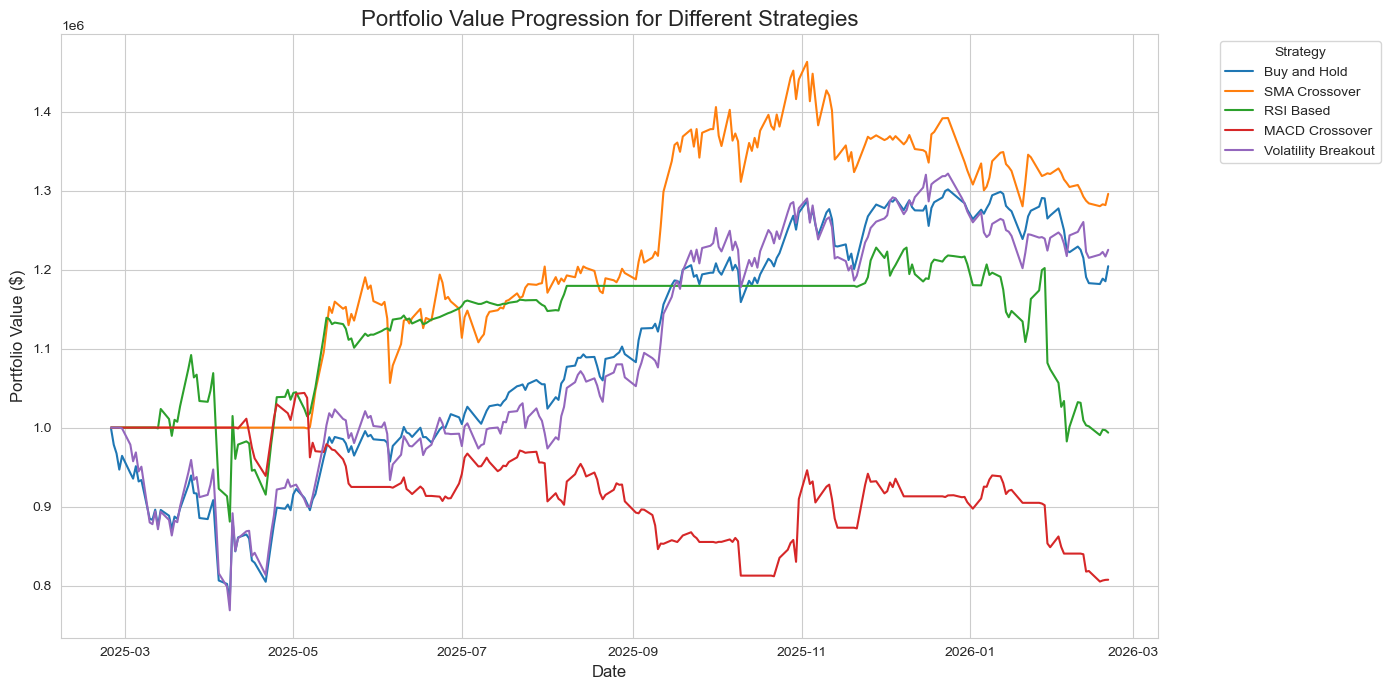

Portfolio value progression plot displayed.


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Plotting daily portfolio value progression for all strategies...')

# Set style for plots
sns.set_style('whitegrid')

# Create the plot
plt.figure(figsize=(14, 7))
for column in all_portfolio_df.columns:
    plt.plot(all_portfolio_df.index, all_portfolio_df[column], label=column)

# Add title and labels
plt.title('Portfolio Value Progression for Different Strategies', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value ($)', fontsize=12)

# Add legend
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

print('Portfolio value progression plot displayed.')

## Final Task
Summarize the simulation results, highlighting which strategies performed best and worst, and discuss the overall implications of the findings for a $1 million portfolio over the simulated year.


## Summary:

### Data Analysis Key Findings

*   **Data Acquisition and Preparation**: Historical daily price data (Open, High, Low, Close, Volume) for six assets (\`AAPL\`, \`GOOGL\`, \`MSFT\`, \`AMZN\`, \`TSLA\`, \`SPY\`) was successfully fetched for a one-year period (approximately 250 trading days) for a \$1 million portfolio simulation.
*   **Strategy Implementation**: Five distinct trading strategies were implemented: Buy and Hold, Simple Moving Average (SMA) Crossover, Relative Strength Index (RSI) Based, Moving Average Convergence Divergence (MACD) Crossover, and Volatility Breakout, each with specific parameters and signal generation logic.
*   **Backtesting Framework**: A comprehensive backtesting function was developed to simulate portfolio performance for each strategy, including initial capital of \$1,000,000, a commission rate of 0.1% per trade, daily cash and holdings management, and daily portfolio value calculation.
*   **Strategy Performance Comparison**:
    *   **SMA Crossover** was the best-performing strategy, yielding a **Total Return of 29.59%** and an **Annualized Return of 29.86%**. It exhibited a Maximum Drawdown of -12.50% and Annualized Volatility of 23.58%.
    *   **Volatility Breakout** also showed positive returns with a **Total Return of 22.51%** and an **Annualized Return of 22.71%**, but had the highest Annualized Volatility (33.37%) and a Maximum Drawdown of -23.13%.
    *   **Buy and Hold** served as a strong benchmark with a **Total Return of 20.43%** and an **Annualized Return of 20.61%**, with a Maximum Drawdown of -16.29% and Annualized Volatility of 20.52%.
    *   **RSI Based** underperformed, resulting in a **Total Return of -0.63%** and an **Annualized Return of -0.63%**.
    *   **MACD Crossover** was the worst performer, showing a **Total Return of -19.26%** and an **Annualized Return of -19.39%**, with the largest Maximum Drawdown of -25.29%.
*   **Portfolio Value Progression**: Visualizations of daily portfolio values clearly demonstrated the superior growth of the SMA Crossover strategy and the decline experienced by the MACD Crossover and RSI Based strategies over the simulated year.

### Insights or Next Steps

*   The SMA Crossover strategy proved to be the most effective among the tested technical analysis strategies for the selected assets and time horizon, significantly outperforming the passive Buy and Hold benchmark.
*   The considerable underperformance of the MACD Crossover and RSI Based strategies suggests that their default parameters or core logic might not be suitable for the current market conditions or chosen assets, warranting further investigation and optimization.
*   **Next Steps**:
    *   Conduct a sensitivity analysis and parameter optimization for all technical strategies to determine if different settings could improve their performance, especially for RSI and MACD.
    *   Implement more sophisticated risk management techniques and additional performance metrics (e.g., Sharpe Ratio, Sortino Ratio) to provide a more holistic evaluation of risk-adjusted returns for each strategy.
